## Loading and using a trained model for Chairs
Notebook demonstrating how to load a JointVAE model and use it for various things.

In [1]:
from utils.load_model import load

path_to_model_folder = './trained_models/chairs/'

model = load(path_to_model_folder)

In [2]:
# Print the latent distribution info
print(model.latent_spec)

{'disc': [2, 2, 2], 'cont': 32}


In [3]:
# Print model architecture
print(model)

VAE(
  (img_to_features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
  )
  (features_to_hidden): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc_mean): Linear(in_features=256, out_features=32, bias=True)
  (fc_log_var): Linear(in_features=256, out_features=32, bias=True)
  (fc_alphas): ModuleList(
    (0): Linear(in_features=256, out_features=2, bias=True)
    (1): Linear(in_features=256, out_features=2, bias=True)
    (2): Linear(in_features=256, out_features=2, bias=True)
  )
  (latent_to_features): Sequential(
    (0): Linear(in_features=38, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_

In [4]:
from viz.visualize import Visualizer as Viz

# Create a Visualizer for the model
viz = Viz(model)
viz.save_images = False  # Return tensors instead of saving images

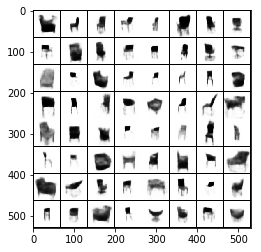

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

samples = viz.samples()
samples = samples.permute(1,2,0)
plt.imshow(samples.numpy())

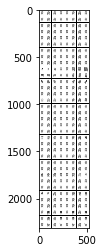

In [14]:
traversals = viz.all_latent_traversals()
traversals = traversals.permute(1,2,0)
plt.imshow(traversals.numpy())

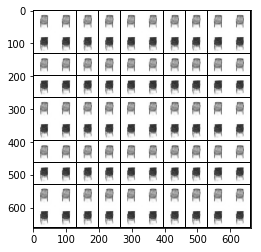

In [15]:
# Traverse 3rd continuous latent dimension across columns and first 
# discrete latent dimension across rows
traversals = viz.latent_traversal_grid(cont_idx=2, cont_axis=1, disc_idx=0, disc_axis=0, size=(10, 10))
traversals = traversals.permute(1,2,0)
plt.imshow(traversals.numpy())

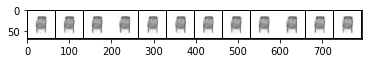

In [16]:
traversal = viz.latent_traversal_line(cont_idx=6, size=12)
traversal = traversal.permute(1,2,0)
plt.imshow(traversal.numpy())

In [23]:
from utils.dataloaders import get_fashion_mnist_dataloaders

# Get MNIST test data
_, dataloader = get_fashion_mnist_dataloaders(batch_size=32)

# Extract a batch of data
for batch, labels in dataloader:
    break
    
recon = viz.reconstructions(batch, size=(8, 8))
recon = recon.permute(1,2,0)
plt.imshow(recon.numpy()[0, :, :], cmap='gray')

 98%|███████████████████████████████████████████████████████████████▉ | 25993216/26421880 [00:20<00:00, 3927765.42it/s]

Extracting ../fashion_data\FashionMNIST\raw\train-images-idx3-ubyte.gz



0it [00:00, ?it/s]
 56%|████████████████████████████████████████▌                                | 16384/29515 [00:01<00:00, 52772.92it/s]
32768it [00:01, 31050.35it/s]                                                                                          

Extracting ../fashion_data\FashionMNIST\raw\train-labels-idx1-ubyte.gz



0it [00:00, ?it/s]
 95%|████████████████████████████████████████████████████████████████▋   | 4210688/4422102 [00:14<00:00, 902495.73it/s]

Extracting ../fashion_data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz




0it [00:00, ?it/s]

  0%|                                                                                         | 0/5148 [00:00<?, ?it/s]

8192it [00:00, 10985.67it/s]                                                                                           

Extracting ../fashion_data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...
Done!


C:\Users\v-tayan\joint-vae\viz\visualize.py:41: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  input_data = Variable(data, volatile=True)


RuntimeError: size mismatch, m1: [32 x 256], m2: [1024 x 256] at c:\new-builder_3\win-wheel\pytorch\aten\src\th\generic/THTensorMath.cpp:2070

26427392it [00:40, 3927765.42it/s]                                                                                     
4423680it [00:28, 902495.73it/s]                                                                                       

In [24]:
from torch.autograd import Variable
encodings = model.encode(Variable(batch))

RuntimeError: size mismatch, m1: [32 x 256], m2: [1024 x 256] at c:\new-builder_3\win-wheel\pytorch\aten\src\th\generic/THTensorMath.cpp:2070

In [11]:
# Continuous encodings for the first 5 examples
encodings['cont'][0][:5]

NameError: name 'encodings' is not defined